In [3]:
import pandas as pd
import seaborn as sns

df= pd.read_csv("/content/profanity_en.csv")  #Using the Profanity dataset
print(df.head())

        text canonical_form_1 canonical_form_2 canonical_form_3  \
0         69               69              NaN              NaN   
1        @55              ass              NaN              NaN   
2   @ssfcker             fuck              ass              NaN   
3  @ssfucker             fuck              ass              NaN   
4  @ssfvcker             fuck              ass              NaN   

                     category_1                   category_2 category_3  \
0  sexual anatomy / sexual acts                          NaN        NaN   
1  sexual anatomy / sexual acts                          NaN        NaN   
2  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
3  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
4  sexual anatomy / sexual acts  sexual orientation / gender        NaN   

   severity_rating severity_description  
0              1.0                 Mild  
1              1.0                 Mild  
2              2.8  

In [4]:
unique_values = df["canonical_form_3"].nunique()
print(unique_values)


5


In [ ]:
df.columns

Index(['text', 'canonical_form_1', 'canonical_form_2', 'canonical_form_3',
       'category_1', 'category_2', 'category_3', 'severity_rating',
       'severity_description'],
      dtype='object')

In [5]:
df.drop(columns=['category_1', 'category_2', 'category_3', 'severity_rating','severity_description','text'], inplace=True)# Dropping all the columns except the ones with Profanity
df

,canonical_form_1,canonical_form_2,canonical_form_3
0,69,NaN,NaN
1,ass,NaN,NaN
2,fuck,ass,NaN
3,fuck,ass,NaN
4,fuck,ass,NaN
...,...,...,...
1593,wank,NaN,NaN
1594,wop,NaN,NaN
1595,wop,NaN,NaN
1596,zipperhead,NaN,NaN


In [6]:
combined = pd.concat([df['canonical_form_1'], df['canonical_form_2'],df['canonical_form_3']], ignore_index=True) # Concatinating all the Profanity columns

# Create a new DataFrame with the combined columns
df_p = pd.DataFrame({'tweet': combined})

# Display the result
print(df_p)

     tweet
0       69
1      ass
2     fuck
3     fuck
4     fuck
...    ...
4789   NaN
4790   NaN
4791   NaN
4792   NaN
4793   NaN

[4794 rows x 1 columns]


In [7]:
df_p= df_p.dropna()
df_p= df_p.drop_duplicates()
df_p= df_p.drop(index=0)
df_p= df_p.reset_index(drop=True)
print(df_p)

           tweet
0            ass
1           fuck
2            sex
3         orgasm
4    ejaculation
..           ...
246          hag
247        nigga
248          pig
249        trash
250      boiolas

[251 rows x 1 columns]


In [8]:
df_p["label"]= 1  #Adding a new column named label and filling value 1(As 1 represnts Profanity)
print(df_p)

           tweet  label
0            ass      1
1           fuck      1
2            sex      1
3         orgasm      1
4    ejaculation      1
..           ...    ...
246          hag      1
247        nigga      1
248          pig      1
249        trash      1
250      boiolas      1

[251 rows x 2 columns]


In [9]:
words = [
    "please", "thank you", "respect", "courteous", "smile", "hug", "laugh", "joke",
    "kindness", "friendly", "gratitude", "polite", "generosity", "appreciation",
    "cheerful", "honor", "considerate", "warmth", "gentleness", "compassion",
    "genuine", "thoughtful", "support", "courtesy", "welcome", "patience", "care",
    "charm", "playful", "affection", "humor", "kind", "benevolence", "understanding",
    "helpful", "tenderness", "jovial", "delight", "goodwill", "positive", "bright",
    "peaceful", "enthusiasm", "sincerity", "politeness", "gentle", "uplifting",
    "caring", "grace", "harmony", "joy", "playfulness", "friendship", "smiling",
    "mirth", "affable", "modesty", "cheer", "love", "tolerance", "good-natured",
    "generous", "optimistic", "gracious", "amusement", "funny", "radiance", "gaiety",
    "merry", "supportive", "exuberant", "easygoing", "lighthearted", "brighten",
    "encouragement", "play", "laughing", "compassionate", "peace", "laughter",
    "lively", "serenity", "sweet", "joviality", "thankfulness", "joyful", "light",
    "grins", "treat", "buddy", "cheerfulness", "happy", "silly", "chuckle", "delighted",
    "hilarious", "genuine", "beaming", "friendly", "companion", "sparkle", "good vibes",
    "blissful", "sassy", "content", "humorous", "warm-hearted", "charming", "optimism",
    "peppy", "nice", "grateful", "high spirits", "blessed", "sparkling", "goofy",
    "joyous", "carefree", "sociable", "fun-loving", "thoughtful", "lively", "giggly",
    "tender", "jovialness", "gratefulness", "affectionate", "jolly", "optimistic",
    "supportive", "sweetness", "congenial", "lightness", "zestful", "comforting",
    "good cheer", "banter", "joyousness", "blitheness", "playfulness", "nice gesture",
    "encouraging", "benevolent", "congeniality", "bubbly", "welcoming", "joviality",
    "care", "hugging", "sunshine", "sweetie", "thankful", "pleasure", "good-humored",
    "cheerful", "uplifted", "kindhearted", "wholesome", "happiness", "high spirits",
    "cheerfully", "joke", "blessing", "grins", "bounce", "generous", "positivity",
    "loveable", "kindness", "joy", "happy-go-lucky", "lightness", "upbeat", "beaming",
    "gratitude", "chuckling", "heartfelt", "chipper", "gentle-hearted", "kindness",
    "heartwarming", "serene", "optimistic", "delightful", "fun", "celebration", "smiling",  "friendly", "cheerful", "respectful", "polite", "joyful", "enthusiastic", "compassion",
    "thoughtful", "kind-hearted", "sociable", "playful", "welcoming", "caring", "helpful",
    "generous", "grateful", "smiling", "optimistic", "considerate", "supportive", "caring",
    "gentle", "lively", "bright", "sweet", "harmonious", "tender", "funny", "cheerful",
    "companionable", "graceful", "uplifting", "peaceful", "affectionate", "thoughtful", "honorable",
    "supportive", "loving", "good-natured", "brightened", "radiant", "delighted","nurturing", "affable", "harmonious", "resilient", "benevolent", "radiant", "compassionate", "optimistic", "energetic", "luminous", "gracious", "gentle-hearted", "generous", "thoughtful", "brightened", "balanced", "patient", "caring", "loving", "serene", "tolerant", "admirable",

]
# Create the DataFrame for non profanity words, that I asked LLM to produce for me
df_n = pd.DataFrame({
    'tweet': words,
    'label': 0  # this fills the entire column with 0 as it represents no profanity
})
print(df_n)

         tweet  label
0       please      0
1    thank you      0
2      respect      0
3    courteous      0
4        smile      0
..         ...    ...
246     caring      0
247     loving      0
248     serene      0
249   tolerant      0
250  admirable      0

[251 rows x 2 columns]


In [40]:
# Combine the two DataFrames vertically (along rows)
df_f = pd.concat([df_p, df_n], ignore_index=True)

# Display the result
print(df_f)

           tweet  label
0            ass      1
1           fuck      1
2            sex      1
3         orgasm      1
4    ejaculation      1
..           ...    ...
497       caring      0
498       loving      0
499       serene      0
500     tolerant      0
501    admirable      0

[502 rows x 2 columns]


<Axes: xlabel='label', ylabel='count'>

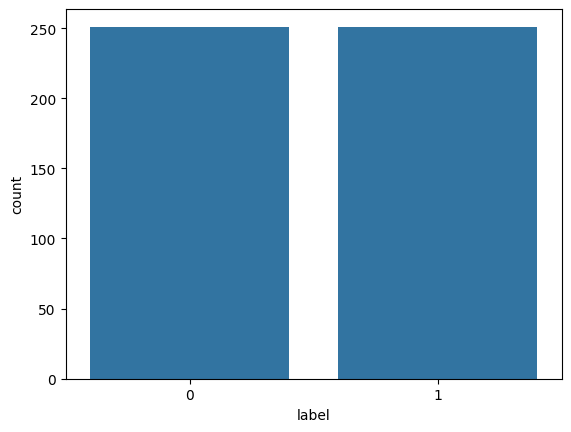

In [42]:
sns.countplot(x='label', data= df_f)

In [11]:
# Importing Imbalanced data
df_id= pd.read_csv("/content/imbalanced_data.csv")
print(df_id)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [12]:
df_id.drop(columns=['id'],inplace= True)
print(df_id)

       label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]


<Axes: xlabel='label', ylabel='count'>

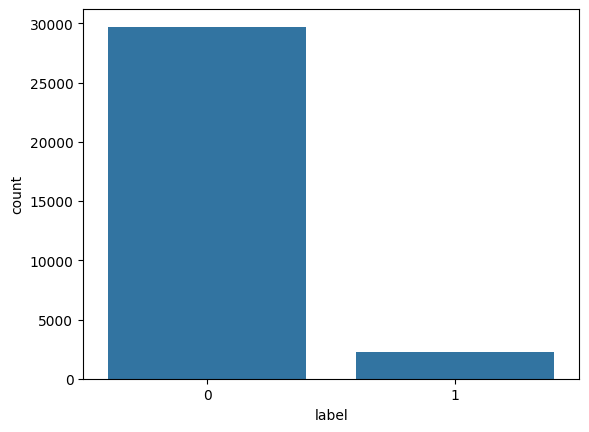

In [13]:
sns.countplot(x='label', data=df_id) #To measure the level of imbalance

In [31]:
#Importing raw data
df_rd= pd.read_csv("/content/raw_data.csv")
print(df_rd)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [23]:
df_rd.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [32]:
#Dropping all the non necessary columns
df_rd.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],inplace= True)
print(df_rd)

       class                                              tweet
0          2  !!! RT @mayasolovely: As a woman you shouldn't...
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...      ...                                                ...
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779      2  you've gone and broke the wrong heart baby, an...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies
24782      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 2 columns]


<Axes: xlabel='class', ylabel='count'>

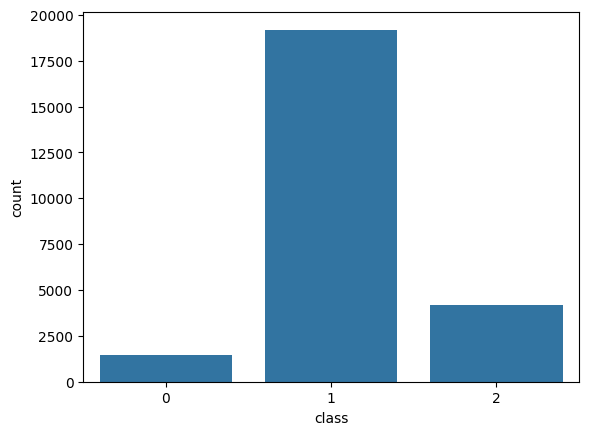

In [25]:
sns.countplot(x="class", data= df_rd) #0-hate, 1- abuse, 2- No hate

In [33]:
df_rd.loc[df_rd['class'] == 0, 'class'] = 1 #Changed all the values of 0 to 1
df_rd

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [34]:
df_rd.loc[df_rd['class'] == 2, 'class'] = 0 #Changed all the values of 2 to 0
df_rd

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='class', ylabel='count'>

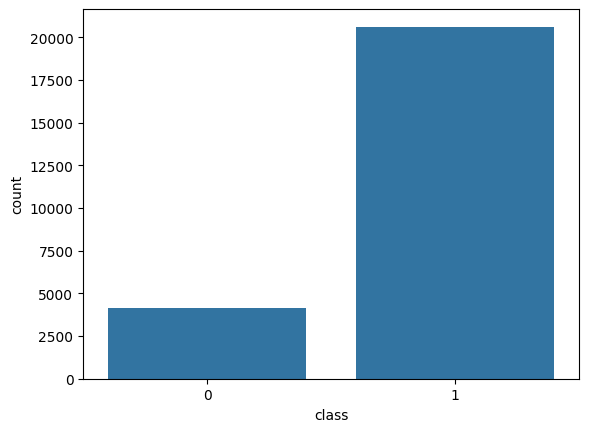

In [35]:
sns.countplot(x="class", data= df_rd)

In [36]:
df_rd.rename(columns={'class':'label'},inplace =True)
df_rd

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [44]:
#Combining all the three dataframes(df_f,df_id, df_rd)
frame = [df_id, df_rd, df_f]
data_frame = pd.concat(frame)
data_frame

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
497,0,caring
498,0,loving
499,0,serene
500,0,tolerant


<Axes: xlabel='label', ylabel='count'>

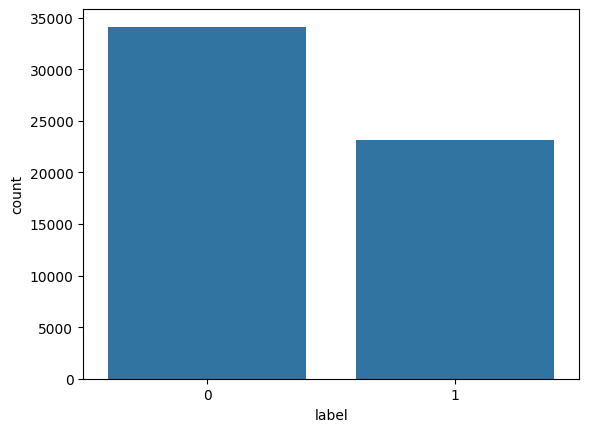

In [45]:
sns.countplot(x="label", data=data_frame) #0=no hate, 1= hate